# Geographic analysis of Lagos Housing Market

**Role:** Geographic Analyst  
**Objective:** Clean and analyze location data to understand market activity, vacancy, and exclusivity.  
**Locations:** Lekki Phase 1, Ikate, Ikoyi, Old Ikoyi, Banana Island, Victoria Island, Oniru, Ajah, Yaba, Elegushi, Agungi, Chevron, Ajah, Sangotedo, Badore, Abaraham Adesanya, Ibeju Lekki, Epe,

### Importing Libraries
 I am importing libraries that would be used accross the code

In [58]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

### Loading Dataset
I am loading and previewing the Merged Dataset

In [59]:
df = pd.read_csv("Merged_dataset.csv")
df

,Title,Location,Price,Bedrooms,Bathrooms,Toilets,Property Type,URL
0,Fully Serviced 3-bedroom Apartment With Study ...,"Old Ikoyi, Ikoyi, Lagos","₦40,000,000 per annum",3,3,4,3 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...
1,Top Rated Luxury 2 Bedroom Penthouse Apartment...,"Old Ikoyi Lagos, Ikoyi, Lagos","$40,000 per annum \napprox. ₦56,842,415",2,2,3,2 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...
2,Luxury 3 Bedroom Apartment,"Ikoyi, Lagos","₦35,000,000 per annum",3,4,4,3 bedroom house for rent,https://nigeriapropertycentre.com/for-rent/hou...
3,Luxury 3 Bedroom Apartment 4th Floor,"Banana Island, Ikoyi, Lagos","₦45,000,000 per annum",3,4,4,3 bedroom house for rent,https://nigeriapropertycentre.com/for-rent/hou...
4,Well Maintained Luxury 4 Bedroom Apartment,"Buena Vista, Banana Island, Ikoyi, Lagos","₦55,000,000 per annum",4,4,5,4 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...
...,...,...,...,...,...,...,...,...
13678,5074,4 Bedroom Terraced Duplex With Bq,"Lekki Gardens, Ajah, Lagos","₦ 120,000,000",4 Bedrooms,4 Bathrooms,5 Toilets,4 bedroom detached duplex for sale
13679,5075,2 Plots Out Of My Land,"Abraham Adesanya, Ajah, Lagos","₦ 100,000,000",NaN,NaN,NaN,Land for sale
13680,5076,2 Plots Of Land Size Measuring 1250sqm,"By Abraham Adesanya, Ajah, Lagos","₦ 240,000,000","1,250 sqm Total Area",NaN,NaN,Land for sale
13681,5077,Plots Of Land,"Lakowe, Ajah, Ibeju Lekki, Lagos","₦ 15,000,000",500 sqm Total Area,NaN,NaN,Mixed-use land for sale


In [60]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 13683 entries, 0 to 13682
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Title          13681 non-null  str  
 1   Location       13681 non-null  str  
 2   Price          13683 non-null  str  
 3   Bedrooms       13683 non-null  str  
 4   Bathrooms      13516 non-null  str  
 5   Toilets        12806 non-null  str  
 6   Property Type  12863 non-null  str  
 7   URL            13681 non-null  str  
dtypes: str(8)
memory usage: 855.3 KB


### Checking for 10 samples of Locations before cleaning

In [61]:
df[['Location', 'Price']].sample(10)

,Location,Price
360,"Parkview, Ikoyi, Lagos","₦40,000,000 per annum"
12773,Luxury 5 Bedroom Duplexes In An Exlusive Estate,"Metro Estate, Ajah, Lagos"
13060,2 Plots Of Dry Land Close To The Beach,"Off Coastal Road, Okun-Ajah, Ajah, Lagos"
12250,Modern 4 Bedroom Detached Duplex,"Ajah, Lagos"
13557,Fully Furnished 4 Bedroom Semi Detached Duplex,"Okun Ajah, Ajah, Lagos"
1697,"Oniru, Victoria Island (VI), Lagos","₦20,000,000 per annum"
7147,"Oba Saheed Elegushi Street, Off Freedom Way, L...","₦320,000per month"
8940,4 Bedroom Terrance,"Ajah, Lagos"
5678,"Off Admiralty Way, Lekki Phase 1, Lekki, Lagos","₦18,500,000per annum"
4251,"Ikate, Lekki, Lagos","₦10,000,000per annum"


### Removing data with no proper properties and adding annual rent in numerical value

- Rows having locations in price
- Annual rent in numerical value

In [62]:
df = df[df['Price'].str.startswith('₦')].copy()
df['numeric_val'] = (
    df['Price']
    .str.replace(r'[^\d]', '', regex=True)
    .replace('', pd.NA)
    .astype('Int64')
)
df = df.dropna(subset=['numeric_val'])

def normalize_price(row):
    price = row['numeric_val']
    text = row['Price']
    
    if 'month' in text:
        return price * 12
    elif 'annum' in text or 'year' in text:
        return price
    else:
        return price
df['Annual_Rent'] = df.apply(normalize_price, axis=1)
df = df[df['Annual_Rent'] > 0]
print(df[['Price', 'Annual_Rent']])


                      Price  Annual_Rent
0     ₦40,000,000 per annum     40000000
2     ₦35,000,000 per annum     35000000
3     ₦45,000,000 per annum     45000000
4     ₦55,000,000 per annum     55000000
5     ₦40,000,000 per annum     40000000
...                     ...          ...
8599    ₦7,000,000per annum      7000000
8600    ₦9,000,000per annum      9000000
8601    ₦7,500,000per annum      7500000
8602   ₦10,000,000per annum     10000000
8603  ₦750,000,000per annum    750000000

[8426 rows x 2 columns]


### Creating Neigbourhood for a set of locations

In [63]:
neighborhoods = [
    "Banana Island",
    "Old Ikoyi",
    "Ikoyi",
    "Victoria Island",
    "Lekki Phase 1",
    "Lekki Phase 2",
    "Ikate",
    "Oniru",
    "Elegushi",
    "Agungi",
    "Chevron",
    "Osapa",
    "Orchid",
    "Jakande",
    "Igbo Efon",
    "Ikota",
    "Ologolo",
    "VGC",
    "Abijo GRA",
    "Ajah",
    "Sangotedo",
    "Badore",
    "Abraham Adesanya",
    "Idado",
    "Ilasan",
    "Oral Estate",
    "Chevy View Estate",
    "Lekki",
    "Ibeju Lekki",
    "Epe",
    "Yaba"
]

neighborhoods = sorted(list(set(neighborhoods)), key=len, reverse=True)

def extract_submarket(location):
    loc = str(location).lower()
    for n in neighborhoods:
        if re.search(rf'\b{re.escape(n.lower())}\b', loc):
            return n
    return "Other"

df['SubMarket'] = df['Location'].apply(extract_submarket)

def macro_market(sub):
    if sub in ["Banana Island", "Old Ikoyi", "Ikoyi"]:
        return "Ikoyi"

    if sub in [
        "Lekki Phase 1", "Ikate", "Oniru", "Elegushi",
        "Agungi", "Chevron", "Osapa", "Orchid",
        "Jakande", "Igbo Efon", "Ikota", "Ologolo", "VGC", "Lekki"
    ]:
        return "Lekki Core"

    if sub in ["Lekki Phase 2", "Ajah", "Sangotedo", "Badore", "Abraham Adesanya",
               "Idado", "Ilasan", "Oral Estate", "Chevy View Estate"]:
        return "Lekki Outer"

    if sub in ["Abijo GRA", "Ibeju Lekki", "Epe"]:
        return "Lekki Far"

    if sub == "Victoria Island":
        return "VI"

    return "Other"

df['MacroMarket'] = df['SubMarket'].apply(macro_market)
df[['Location', 'SubMarket', 'MacroMarket']].sample(10)


,Location,SubMarket,MacroMarket
8093,"Off Admiralty Way, Lekki Phase 1, Lekki, Lagos",Lekki Phase 1,Lekki Core
7296,"Chevron, Lekki, Lagos",Chevron,Lekki Core
5061,"Freedom Way, Lekki Phase 1, Lekki, Lagos",Lekki Phase 1,Lekki Core
1598,"Banana Island, Ikoyi, Lagos",Banana Island,Ikoyi
1272,"Banana Island, Ikoyi, Lagos",Banana Island,Ikoyi
567,"Banana Island, Ikoyi, Lagos",Banana Island,Ikoyi
5599,"Off Christ Avenue, Off Admiralty Road, Lekki P...",Lekki Phase 1,Lekki Core
5399,"Ikate, Lekki, Lagos",Ikate,Lekki Core
4653,"Off Freedom Way, Ikate, Lekki, Lagos",Ikate,Lekki Core
6752,"Lekki Phase 1, Lekki, Lagos",Lekki Phase 1,Lekki Core


In [64]:
df['MacroMarket'].value_counts()

MacroMarket
Lekki Core     4934
Ikoyi          1815
VI             1513
Lekki Outer     162
Lekki Far         2
Name: count, dtype: int64

In [65]:
df

,Title,Location,Price,Bedrooms,Bathrooms,Toilets,Property Type,URL,numeric_val,Annual_Rent,SubMarket,MacroMarket
0,Fully Serviced 3-bedroom Apartment With Study ...,"Old Ikoyi, Ikoyi, Lagos","₦40,000,000 per annum",3,3,4,3 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...,40000000,40000000,Old Ikoyi,Ikoyi
2,Luxury 3 Bedroom Apartment,"Ikoyi, Lagos","₦35,000,000 per annum",3,4,4,3 bedroom house for rent,https://nigeriapropertycentre.com/for-rent/hou...,35000000,35000000,Ikoyi,Ikoyi
3,Luxury 3 Bedroom Apartment 4th Floor,"Banana Island, Ikoyi, Lagos","₦45,000,000 per annum",3,4,4,3 bedroom house for rent,https://nigeriapropertycentre.com/for-rent/hou...,45000000,45000000,Banana Island,Ikoyi
4,Well Maintained Luxury 4 Bedroom Apartment,"Buena Vista, Banana Island, Ikoyi, Lagos","₦55,000,000 per annum",4,4,5,4 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...,55000000,55000000,Banana Island,Ikoyi
5,Newly Built Three Bedroom Penthouse,"Ikoyi, Lagos","₦40,000,000 per annum",3,3,4,3 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...,40000000,40000000,Ikoyi,Ikoyi
...,...,...,...,...,...,...,...,...,...,...,...,...
8599,3 bedroom terraced duplex for rent,"Ikota Villa, Lekki, Lagos","₦7,000,000per annum",3,3,4,3 bedroom terraced duplex for rent,https://nigeriapropertycentre.com/for-rent/hou...,7000000,7000000,Ikota,Lekki Core
8600,4 bedroom semi-detached duplex for rent,"Ikota Villa Estate, Lekki, Lagos","₦9,000,000per annum",4,4,5,4 bedroom semi-detached duplex for rent,https://nigeriapropertycentre.com/for-rent/hou...,9000000,9000000,Ikota,Lekki Core
8601,4 bedroom terraced duplex for rent,"Ikota Villa Estate, Lekki, Lagos","₦7,500,000per annum",4,4,5,4 bedroom terraced duplex for rent,https://nigeriapropertycentre.com/for-rent/hou...,7500000,7500000,Ikota,Lekki Core
8602,3 bedroom terraced duplex for rent,"Orchid, Lekki, Lagos","₦10,000,000per annum",3,3,4,3 bedroom terraced duplex for rent,https://nigeriapropertycentre.com/for-rent/hou...,10000000,10000000,Orchid,Lekki Core


## Analysis Begins

### Top 10 Busiest Locations

C:\Users\sanyaolu\AppData\Local\Temp\ipykernel_14548\1730726248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\sanyaolu\AppData\Local\Temp\ipykernel_14548\1730726248.py:18: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\sanyaolu\Documents\dev\freelance-projects\backend\scrape-props\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


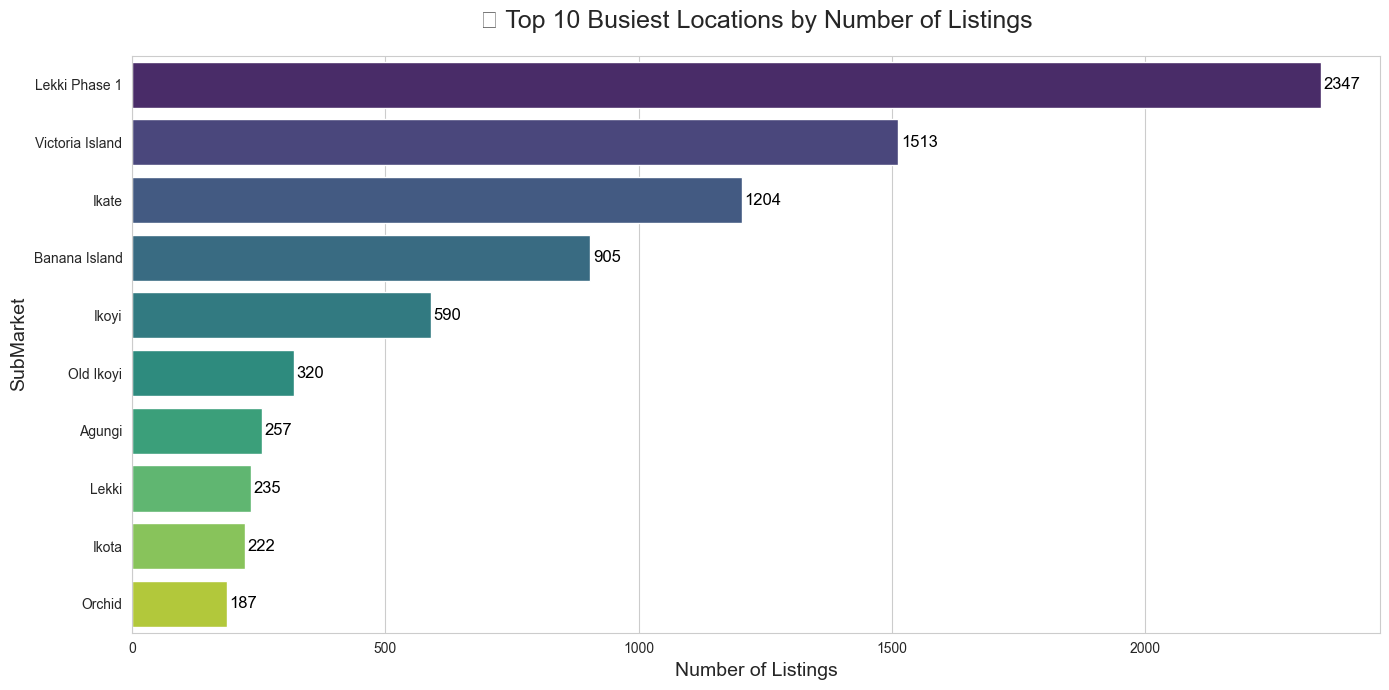

In [66]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)
top10 = df['SubMarket'].value_counts().head(10)

plt.figure(figsize=(14,7))
sns.barplot(
    x=top10.values,
    y=top10.index,
    palette=sns.color_palette("viridis", len(top10)),
    dodge=False,
    legend=False
)
plt.title("🏠 Top 10 Busiest Locations by Number of Listings", fontsize=18, pad=20)
plt.xlabel("Number of Listings", fontsize=14)
plt.ylabel("SubMarket", fontsize=14)
for i, v in enumerate(top10.values):
    plt.text(v + 5, i, str(v), color='black', va='center', fontsize=12)
plt.tight_layout()
plt.show()

### Vacancy Heatmap

C:\Users\sanyaolu\AppData\Local\Temp\ipykernel_14548\2782442955.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\sanyaolu\Documents\dev\freelance-projects\backend\scrape-props\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


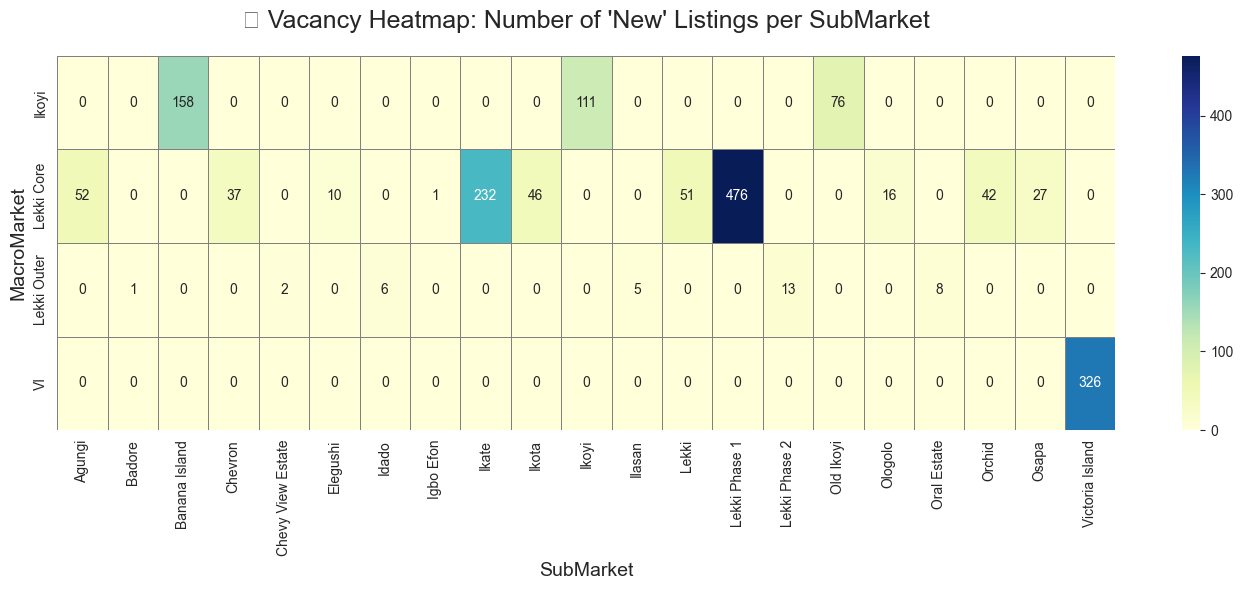

In [70]:
if 'Status' not in df.columns:
    df['Status'] = np.where(np.random.rand(len(df)) < 0.2, 'New', 'Existing')

# Pivot for heatmap
heatmap_data = df[df['Status']=='New'].groupby(['MacroMarket','SubMarket']).size().unstack(fill_value=0)

plt.figure(figsize=(14,6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt="d", 
    cmap="YlGnBu", 
    linewidths=0.5, 
    linecolor='gray'
)
plt.title("📊 Vacancy Heatmap: Number of 'New' Listings per SubMarket", fontsize=18, pad=20)
plt.ylabel("MacroMarket", fontsize=14)
plt.xlabel("SubMarket", fontsize=14)
plt.tight_layout()
plt.show()

### The "Exclusivity" Chart

C:\Users\sanyaolu\AppData\Local\Temp\ipykernel_14548\3994239513.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\sanyaolu\AppData\Local\Temp\ipykernel_14548\3994239513.py:15: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\sanyaolu\Documents\dev\freelance-projects\backend\scrape-props\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


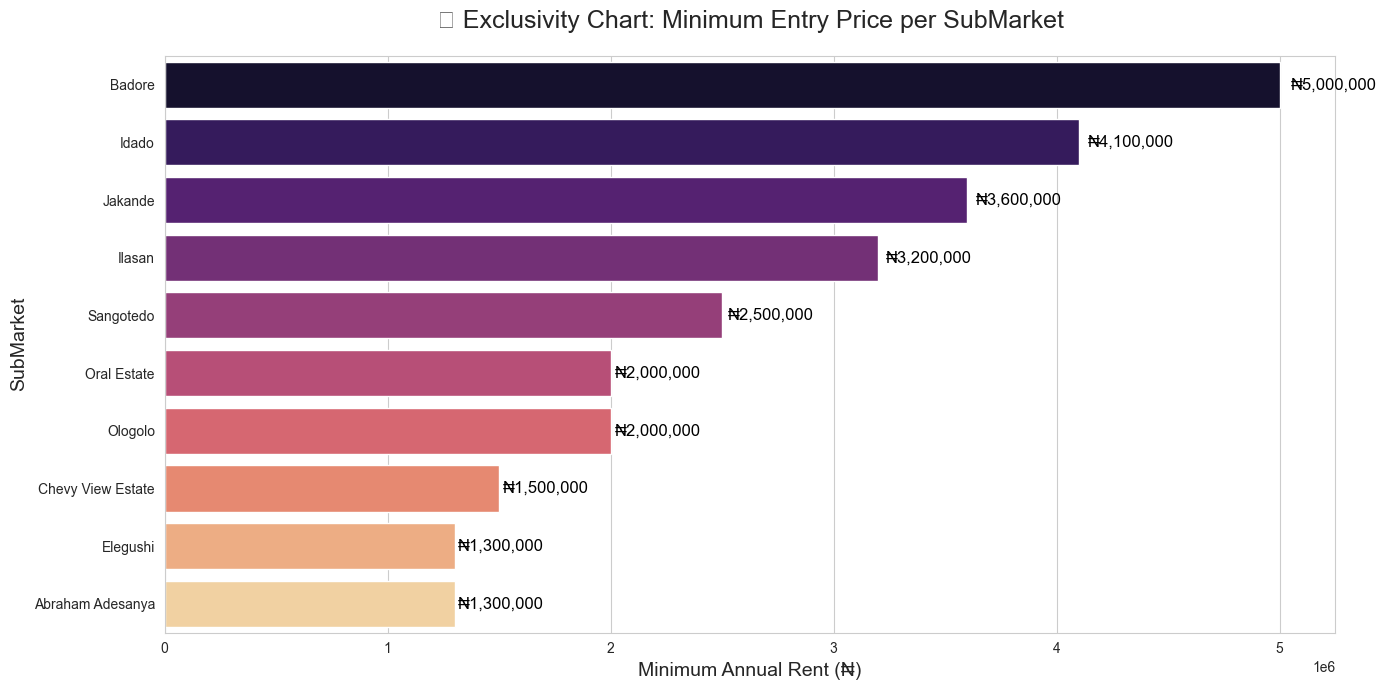

In [68]:
min_rent = df.groupby('SubMarket')['Annual_Rent'].min().sort_values(ascending=False).head(10)

plt.figure(figsize=(14,7))
sns.barplot(
    x=min_rent.values, 
    y=min_rent.index, 
    palette=sns.color_palette("magma", len(min_rent)),
    dodge=False
)
plt.title("💎 Exclusivity Chart: Minimum Entry Price per SubMarket", fontsize=18, pad=20)
plt.xlabel("Minimum Annual Rent (₦)", fontsize=14)
plt.ylabel("SubMarket", fontsize=14)
for i, v in enumerate(min_rent.values):
    plt.text(v + 0.01*v, i, f"₦{v:,}", color='black', va='center', fontsize=12)
plt.tight_layout()
plt.show()